In [5]:
import matplotlib.pyplot as plt
import keras
from keras.models import Model, Sequential
from keras.layers import *
from keras.optimizers import Adam, Adagrad, Adadelta, Adamax, SGD

import tensorflow as tf
import numpy as np

import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, LabelBinarizer

%matplotlib inline

In [6]:
## Creating a Dataset
N_datapoints = 100000
n_labels = 100

X = np.random.random_integers(0,n_labels,size=(N_datapoints,2))
y = np.sum(X,axis=1)

## Normalizing the inputs
X = X/100.0

## Converting the Outputs into one-hot encoding (classification)
# y_OH = np.zeros((len(y),2*n_labels+1))
# for i, val in enumerate(y):
#     y_OH[i,val] = 1

lb = LabelBinarizer()
y_OH = lb.fit_transform(y)

# OHE =  OneHotEncoder()
# y_OH  = OHE.fit_transform(y[:])


## Train Test Split of the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y_OH, test_size=0.2, random_state=42)

## Removal of 50 from the train set
ind50  = y_train[:,49] == 1
y50 = y_train[ind50]
y_train = y_train[~ind50,:]
x50 = X_train[ind50,:]
X_train = X_train[~ind50,:]

print 'Size of Training set', X_train.shape

/nfs/p4/ceusers/limpin/.venv2.7-gpu/lib/python2.7/site-packages/ipykernel_launcher.py:5: DeprecationWarning: This function is deprecated. Please call randint(0, 100 + 1) instead
  """


Size of Training set (79603, 2)


In [7]:
## Creating the Deep-learning network
# Training Parameters 
learning_rate = 0.1
training_epochs = 1000
decay_rate = learning_rate / training_epochs 
# momentum = 0.8
# adam = Adam(lr=learning_rate, decay=decay_rate)

batch_size = int(0.6*N_datapoints)

# Network Parameters
n_hidden_1 = 100 # 1st layer number of neurons
n_hidden_2 = 100 # 2nd layer number of neurons
n_hidden_3 = 200 # 2nd layer number of neurons
n_classes = 2*n_labels+1 # MNIST classes for prediction(digits 0-9 )

Inp = Input(shape=(X_train.shape[1],))
x = Dense(n_hidden_1, activation='relu', name = "Dense_1")(Inp)
# x = Dropout(0.8)(x)
x = Dense(n_hidden_2, activation='tanh', name = "Dense_2")(x)
# x = Dropout(0.8)(x)
x = Dense(n_hidden_3, activation='tanh', name = "Dense_3")(x)
# x = Dropout(0.5)(x)
output = Dense(n_classes, activation='softmax', name = "Outputlayer")(x)

model = Model(Inp, output)

model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 2)                 0         
_________________________________________________________________
Dense_1 (Dense)              (None, 100)               300       
_________________________________________________________________
Dense_2 (Dense)              (None, 100)               10100     
_________________________________________________________________
Dense_3 (Dense)              (None, 200)               20200     
_________________________________________________________________
Outputlayer (Dense)          (None, 201)               40401     
Total params: 71,001
Trainable params: 71,001
Non-trainable params: 0
_________________________________________________________________


In [19]:
model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['acc'])

from keras.callbacks import EarlyStopping,LearningRateScheduler,ReduceLROnPlateau, TensorBoard
callbacks = [ReduceLROnPlateau(monitor='loss'),
            TensorBoard(log_dir="logs/{}",histogram_freq=1)]

In [20]:
## Determine benchmark accuracy of test_set
print "Benchmark Accuracy of testset = %0.4f" %(sum(lb.inverse_transform(y_test) != 50)/float(len(y_test))) # Use Label Binarizer

Benchmark Accuracy of testset = 0.9954


In [ ]:
history = model.fit(X_train, y_train,
                    batch_size=batch_size,
                    epochs=training_epochs,
                    callbacks = callbacks,
                    verbose=1, # This is for what we want it to display out as it trains 
                    validation_data=(X_test, y_test))

Train on 79603 samples, validate on 20000 samples
Epoch 1/1000
79603/79603 [==============================] - 4s - loss: 1.0552 - acc: 0.7262 - val_loss: 0.5001 - val_acc: 0.9446
Epoch 2/1000
79603/79603 [==============================] - 4s - loss: 0.7060 - acc: 0.7671 - val_loss: 1.6329 - val_acc: 0.1607
Epoch 3/1000
79603/79603 [==============================] - 4s - loss: 1.2977 - acc: 0.3427 - val_loss: 0.5995 - val_acc: 0.8751
Epoch 4/1000
79603/79603 [==============================] - 4s - loss: 0.6742 - acc: 0.7455 - val_loss: 1.0809 - val_acc: 0.3416
Epoch 5/1000
79603/79603 [==============================] - 4s - loss: 0.8737 - acc: 0.4844 - val_loss: 0.5028 - val_acc: 0.9180
Epoch 6/1000
79603/79603 [========================

In [11]:
def plot_train(hist):
    h = hist.history
    if 'acc' in h:
        meas='acc'
        loc='lower right'
    else:
        meas='loss'
        loc='upper right'
    plt.figure(figsize=(20,8))
    plt.plot(hist.history[meas])
    plt.plot(hist.history['val_'+meas])
    plt.title('model '+meas)
    plt.ylabel(meas)
    plt.xlabel('epoch')
    plt.legend(['train', 'validation'], loc=loc)

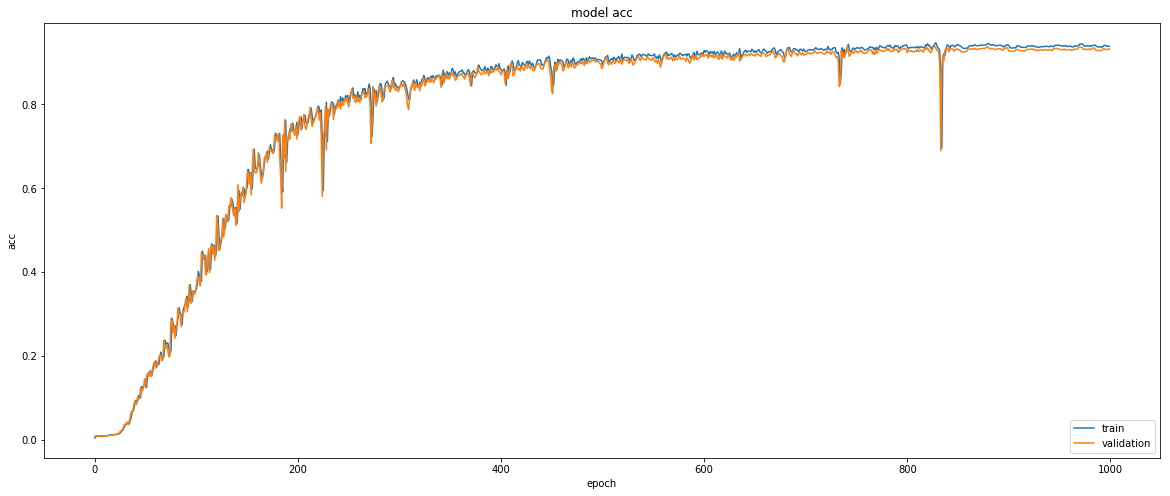

In [12]:
plot_train(history)

In [13]:
preds = model.predict(x50)
print 'Blind testing accuracy:', (sum(lb.inverse_transform(preds)==50) / float(preds.shape[0]))

Blind testing accuracy: 0.523929471033


In [ ]:
# Second try with variable learning rate
learning_rate = 0.8
training_epochs = 3000
decay_rate = learning_rate / training_epochs 
momentum = 0.8
sgd = SGD(lr=learning_rate, momentum=momentum, decay=decay_rate, nesterov=False)

In [ ]:
history = model.fit(X_train, y_train,
                    batch_size=batch_size,
                    epochs=training_epochs,
                    verbose=1, # This is for what we want it to display out as it trains 
                    validation_data=(X_test, y_test))

In [ ]:
plot_train(history)